In [1]:
# Importing Required  Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('kickstarter.csv')

In [3]:
df.head(5)

,currency,deadline,launched,state,backers,country,usd_pledged,usd_goal,duration,backer_goal,...,GDP per capita (currency US$),employment rate,inflation rate,usd_goal_iqr,usd_goal_transformed,usd_pledged_transformed,backers_transformed,backer_goal_transformed,days_transformed,duration_transformed
0,USD,2017-01-11,2017-02-09,failed,15,US,2421.0,30000.0,60,2000,...,65840.0,70.11017,2.130110,28336.4125,8.624656,13.323201,3.210250,7.600902,7.745967,7.745967
1,USD,2015-08-29,2015-04-07,failed,14,US,1283.0,19500.0,56,1393,...,59320.0,68.70962,0.118627,19500.0000,8.361223,11.678974,3.114581,7.239215,7.483315,7.483315
2,USD,2016-03-17,2016-01-02,failed,40,US,453.0,25000.0,45,625,...,62440.0,69.35136,1.261583,25000.0000,8.536737,9.254794,4.661344,6.437752,6.708204,6.708204
3,USD,2013-08-04,2013-09-03,successful,100,US,12700.0,12500.0,30,125,...,53920.0,67.35994,1.464833,12500.0000,8.043287,18.296764,6.183543,4.828314,5.477226,5.477226
4,USD,2015-02-28,2015-01-29,failed,11,US,664.0,2500.0,30,227,...,59320.0,68.70962,0.118627,2500.0000,6.850638,10.108126,2.786441,5.424950,5.477226,5.477226


In [4]:
columns_to_drop = ['deadline', 'launched', 'days_transformed', 'currency']
df = df.drop(columns=columns_to_drop)

In [5]:
columns_to_convert = ['state', 'country', 'Major Cat', 'quarter', 'year']
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [6]:
df.dtypes

state                            category
backers                             int64
country                          category
usd_pledged                       float64
usd_goal                          float64
duration                            int64
backer_goal                         int64
year                             category
quarter                          category
Major Cat                        category
GDP per capita (currency US$)     float64
employment rate                   float64
inflation rate                    float64
usd_goal_iqr                      float64
usd_goal_transformed              float64
usd_pledged_transformed           float64
backers_transformed               float64
backer_goal_transformed           float64
duration_transformed              float64
dtype: object

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming your DataFrame is named 'df'
# Select the columns you want to include in PCA
selected_columns = ['backers', 'usd_pledged', 'usd_goal', 'duration', 'backer_goal', 
                    'GDP per capita (currency US$)', 'employment rate', 'inflation rate', 
                    'usd_goal_iqr', 'usd_goal_transformed', 'usd_pledged_transformed', 
                    'backers_transformed', 'backer_goal_transformed', 'duration_transformed']

# Create a subset of the DataFrame with selected columns
data = df[selected_columns]

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(data_standardized)

# Access the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Variance explained by PC{i + 1}: {ratio:.4f}')

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print(f'Cumulative Explained Variance: {cumulative_explained_variance[-1]:.4f}')


Variance explained by PC1: 0.3065
Variance explained by PC2: 0.2651
Variance explained by PC3: 0.1480
Variance explained by PC4: 0.0881
Variance explained by PC5: 0.0619
Variance explained by PC6: 0.0528
Variance explained by PC7: 0.0285
Variance explained by PC8: 0.0256
Variance explained by PC9: 0.0116
Variance explained by PC10: 0.0082
Variance explained by PC11: 0.0025
Variance explained by PC12: 0.0008
Variance explained by PC13: 0.0004
Variance explained by PC14: 0.0000
Cumulative Explained Variance: 1.0000


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming your DataFrame is named 'df'
# Select the columns you want to include in PCA
selected_columns = ['backers', 'usd_pledged', 'usd_goal', 'duration', 'backer_goal', 
                    'GDP per capita (currency US$)', 'employment rate', 'inflation rate', 
                    'usd_goal_iqr', 'usd_goal_transformed', 'usd_pledged_transformed', 
                    'backers_transformed', 'backer_goal_transformed', 'duration_transformed']

# Create a subset of the DataFrame with selected columns
data = df[selected_columns]

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Perform PCA
n_components = 6  # You can change the number of components as needed
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_standardized)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'])


In [11]:
principal_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.907398,4.812421,1.488016,1.209091,0.212329,-1.860919
1,3.384618,2.828620,1.185440,1.977544,0.582591,0.775646
2,2.407114,3.114284,0.274823,1.031969,0.367453,-0.569773
3,-1.903029,1.883332,-0.194274,-0.592178,0.329580,0.443252
4,1.358739,-1.940904,-0.956898,1.423304,0.728931,0.917169
...,...,...,...,...,...,...
144438,-2.388866,-0.786605,-1.625114,1.031976,0.676260,0.991516
144439,1.326527,3.360173,-0.273567,-1.825017,-2.637872,0.544498
144440,1.328078,-1.180571,-0.005725,-1.049052,0.162828,0.095210
144441,-1.341539,-0.633957,-0.643776,0.812522,-1.027038,-1.082187


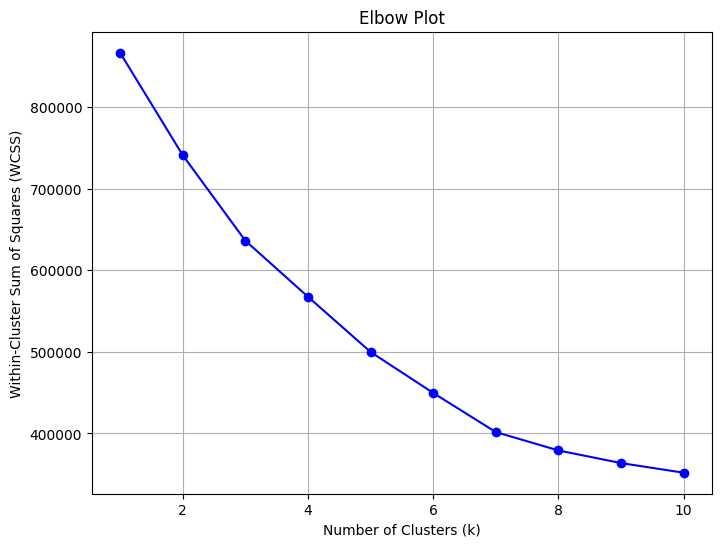

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming you have performed PCA and stored the principal components in principal_df

# Create a subset of your DataFrame with the principal components
X = principal_df

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Define a range of k values to test
k_values = range(1, 11)  # You can adjust the range as needed

# Initialize an empty list to store the WCSS values
wcss = []

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_standardized)
    wcss.append(kmeans.inertia_)

# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Plot')
plt.grid(True)
plt.show()


Optimal number of clusters (k): 5


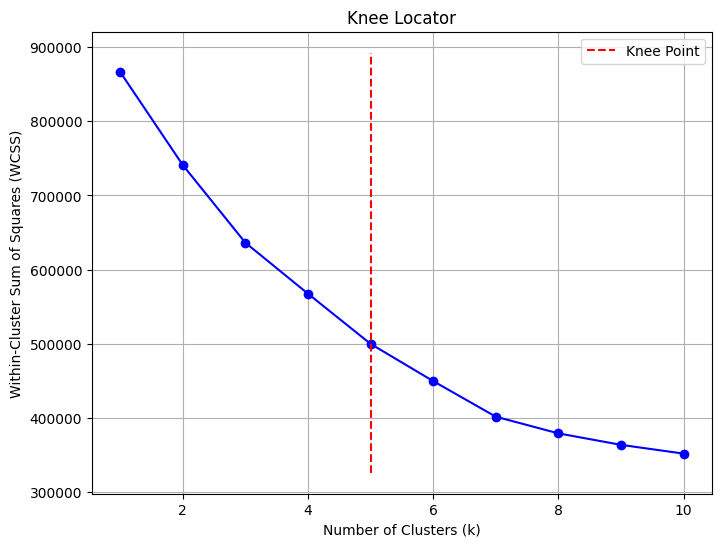

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Assuming you have performed PCA and stored the principal components in principal_df

# Create a subset of your DataFrame with the principal components
X = principal_df

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Define a range of k values to test
k_values = range(1, 11)  # You can adjust the range as needed

# Initialize an empty list to store the WCSS values
wcss = []

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_standardized)
    wcss.append(kmeans.inertia_)

# Create the knee locator
kneedle = KneeLocator(k_values, wcss, curve='convex', direction='decreasing')

# Plot the WCSS and knee point
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Knee Locator')
plt.grid(True)

# Plot the knee point
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='r', label='Knee Point')
plt.legend()

# The knee point (optimal k) is accessible with kneed.elbow
optimal_k = kneedle.elbow
print(f'Optimal number of clusters (k): {optimal_k}')

plt.show()


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming you have performed PCA and stored the principal components in principal_df
# Also, assuming you have already performed K-Means clustering and added cluster labels to your original DataFrame as 'cluster_labels'

# Create a subset of your DataFrame with the principal components
X = principal_df

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Specify the number of clusters (k)
k = 5

# Create and fit a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_standardized)

# Add the cluster labels to the original DataFrame
df['cluster_labels'] = kmeans.labels_

# Study each cluster
for cluster_id in range(k):
    cluster_data = df[df['cluster_labels'] == cluster_id]
    
    # You can perform various analyses on the cluster_data to understand its characteristics.
    # For example, you can calculate summary statistics, visualize the data, or extract meaningful insights.
    
    print(f"Cluster {cluster_id}:")
    print(f"Number of data points in this cluster: {len(cluster_data)}")
    
    # Here, you can analyze the cluster_data as needed.
    # For example, you might want to calculate the mean or median values of each feature within the cluster.

    # For summary statistics:
    print(cluster_data.describe())

    # For visualization:
    # You can create scatter plots, histograms, or other relevant visualizations for this cluster.

    # For insights:
    # You can explore patterns, anomalies, or unique characteristics within this cluster.

    print("\n")

# Now, you have studied each cluster individually and can analyze their specific characteristics.


Cluster 0:
Number of data points in this cluster: 30095
            backers   usd_pledged      usd_goal      duration   backer_goal  \
count  30095.000000  30095.000000  30095.000000  30095.000000  30095.000000   
mean      65.755508   4900.989667   8855.479763     31.293338    387.454162   
std       64.416974   5081.018006   7676.994783      8.433443    594.652162   
min        1.000000    200.300000   1001.000000      1.000000      4.000000   
25%       17.000000   1115.000000   3000.000000     30.000000     58.000000   
50%       43.000000   3050.000000   6000.000000     30.000000    132.000000   
75%       93.000000   6923.000000  12000.000000     32.000000    425.000000   
max      299.000000  23987.610000  39997.000000     61.000000   3492.000000   

       GDP per capita (currency US$)  employment rate  inflation rate  \
count                   30095.000000     30095.000000    30095.000000   
mean                    63839.436950        70.286224        1.646037   
std          

            backers   usd_pledged      usd_goal      duration   backer_goal  \
count  14428.000000  14428.000000  14428.000000  14428.000000  14428.000000   
mean      59.835320   4334.568542   8252.304127     31.981841    373.546022   
std       59.520517   4720.244137   8004.563704      9.834075    582.724329   
min        1.000000    200.190000   1000.460000      1.000000      4.000000   
25%       17.000000   1049.490000   2592.127500     30.000000     52.750000   
50%       39.000000   2583.915000   5219.210000     30.000000    124.000000   
75%       81.000000   5787.197500  11182.510000     32.000000    404.000000   
max      299.000000  23988.640000  39988.500000     61.000000   3496.000000   

       GDP per capita (currency US$)  employment rate  inflation rate  \
count                   14428.000000     14428.000000    14428.000000   
mean                    45792.652897        73.542006        1.389840   
std                      3874.413315         1.144485        0.786229

Cluster 0: The Overachievers

Number of data points: 30,095
Characteristics:
These projects have a high average number of backers, approximately 65.
They raise an average of around $4,900 USD, which significantly exceeds their goal of approximately $8,855 USD.
Typically, these projects have a short duration of around 31 days.
The average number of backers far exceeds the goal set for backers.
These projects are often seen in regions with a high GDP per capita and low inflation rates.
Insights: These projects consistently overperform regarding the number of backers, funds raised, and goal attainment, mainly in regions with strong economic indicators.
Cluster 1: The Patient Pursuers

Number of data points: 18,556
Characteristics:
Projects in this cluster have an average of around 53 backers.
They raise about $4,175 USD, which is close to their goal of approximately $8,513 USD.
These projects often have a lengthy duration, averaging around 56 days.
The number of backers closely aligns with their set goal.
Typically found in regions with moderate GDP per capita and employment rates.
Insights: These projects require longer durations to reach their funding goal, with moderate success in matching backers with their funding goal.
Cluster 2: The Strong Starters

Number of data points: 62,345
Characteristics:
These projects have an average of approximately 63 backers.
They raise an average of around $4,586 USD, which is relatively close to their goal of approximately $7,637 USD.
The duration for these projects is short, averaging about 29 days.
The number of backers aligns well with their set goal.
These projects are often located in regions with moderate GDP per capita and employment rates.
Insights: These projects achieve success with a shorter duration, demonstrating a good balance between backers and funding goals.
Cluster 3: The Goal-Oriented Creators

Number of data points: 14,428
Characteristics:
Projects in this cluster have an average of about 60 backers.
They raise around $4,334 USD, which is reasonably close to their goal of approximately $8,252 USD.
These projects typically run for an average duration of 32 days.
The number of backers closely aligns with their set goal.
These projects are often found in regions with lower GDP per capita and higher employment rates.
Insights: These projects are goal-oriented, achieving their funding objectives with the support of an adequate number of backers.
Cluster 4: The High Hopes Crew

Number of data points: 19,019
Characteristics:
These projects have an average of approximately 61 backers.
They raise an average of around $4,814 USD, which is close to their goal of approximately $9,063 USD.
The duration for these projects is relatively long, averaging about 33 days.
The number of backers closely aligns with their set goal.
These projects are often located in regions with moderate GDP per capita and slightly higher inflation rates.
Insights: These projects show patience, with longer durations, achieving moderate success in matching backers with their funding goal.
These clusters provide valuable insights into different project profiles, helping you tailor strategies for Kickstarter projects depending on their characteristics and goals.

Cluster 0: High Achievers

Many backers, surpassing their funding goal.
Often found in economically stable regions.
Cluster 1: Steady Progress

Moderate backers, reaching their goal.
Common in regions with medium economic indicators.
Cluster 2: Quick Success

Good balance of backers and funding.
Thrive with shorter project durations.
Cluster 3: Goal-Oriented

Achieve goals with a reasonable number of backers.
Typically in regions with lower economic indicators.
Cluster 4: Hopeful Campaigns

Patiently approach their funding goal.
Often found in regions with moderate economic indicators.

In [17]:
pip install kmodes


Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install pandas scikit-learn kmodes


Note: you may need to restart the kernel to use updated packages.


In [20]:
# List of columns to include in the categorical DataFrame
categorical_columns = ['state', 'country', 'year', 'quarter', 'Major Cat']

# Create a new DataFrame containing only the categorical columns
categorical_df = df[categorical_columns].copy()

# The 'categorical_df' now contains only the specified categorical columns.


In [23]:
# Combine the PC DataFrame and categorical variables DataFrame
combined_df = pd.concat([principal_df,categorical_df], axis=1)


In [26]:
combined_df

,PC1,PC2,PC3,PC4,PC5,PC6,state,country,year,quarter,Major Cat
0,3.907398,4.812421,1.488016,1.209091,0.212329,-1.860919,failed,US,2017,3,"Film, Video & Theater"
1,3.384618,2.828620,1.185440,1.977544,0.582591,0.775646,failed,US,2015,3,"Film, Video & Theater"
2,2.407114,3.114284,0.274823,1.031969,0.367453,-0.569773,failed,US,2016,1,Food & Beverage
3,-1.903029,1.883332,-0.194274,-0.592178,0.329580,0.443252,successful,US,2013,1,Music & Performance
4,1.358739,-1.940904,-0.956898,1.423304,0.728931,0.917169,failed,US,2015,1,Arts & Crafts
...,...,...,...,...,...,...,...,...,...,...,...
144438,-2.388866,-0.786605,-1.625114,1.031976,0.676260,0.991516,successful,US,2015,4,Arts & Crafts
144439,1.326527,3.360173,-0.273567,-1.825017,-2.637872,0.544498,failed,GB,2013,3,Publishing & Literature
144440,1.328078,-1.180571,-0.005725,-1.049052,0.162828,0.095210,failed,US,2012,3,Publishing & Literature
144441,-1.341539,-0.633957,-0.643776,0.812522,-1.027038,-1.082187,successful,CA,2014,1,Music & Performance


In [27]:
from kmodes.kprototypes import KPrototypes
import numpy as np
import pandas as pd

# Assuming you have combined_df as the DataFrame containing both numerical and categorical data

# Select the number of clusters (n_clusters)
n_clusters = 5

# Define the column indices for the numerical and categorical data
# Adjust these indices based on your combined DataFrame
numerical_indices = [0, 1, 2, 3,4,5]  # Replace with the actual indices of numerical columns
categorical_indices = [6, 7, 8,9,10]  # Replace with the actual indices of categorical columns

# Extract the data for clustering
data = combined_df.iloc[:, numerical_indices + categorical_indices]

# Create an array of the same data with numerical data as integers
data_values = data.values
data_values[:, numerical_indices] = data_values[:, numerical_indices].astype(float)

# Define the K-Prototypes model with the number of clusters and random state
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=2, random_state=0)

# Fit the model to the data
clusters = kproto.fit_predict(data_values, categorical=categorical_indices)

# Add the cluster labels back to the DataFrame
combined_df['cluster'] = clusters

# Now you can analyze the data for each cluster
cluster_summaries = []

for cluster_label in range(n_clusters):
    cluster_data = combined_df[combined_df['cluster'] == cluster_label]
    cluster_summary = cluster_data.describe()
    cluster_summaries.append(cluster_summary)

# Print or analyze cluster summaries as needed
for cluster_label, summary in enumerate(cluster_summaries):
    print(f"Cluster {cluster_label} Summary:")
    print(summary)

# You can also analyze which categories/domains are present in each cluster
category_counts_by_cluster = combined_df.groupby('cluster')['Major Cat'].value_counts()
print("Category Counts by Cluster:")
print(category_counts_by_cluster)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 45760, ncost: 1283345.8223162808
Run: 1, iteration: 2/100, moves: 22842, ncost: 1249911.6140576657
Run: 1, iteration: 3/100, moves: 12630, ncost: 1239400.8697645874
Run: 1, iteration: 4/100, moves: 6787, ncost: 1235794.2630633228
Run: 1, iteration: 5/100, moves: 3834, ncost: 1234783.7795909308
Run: 1, iteration: 6/100, moves: 2349, ncost: 1234158.8950591648
Run: 1, iteration: 7/100, moves: 1412, ncost: 1234069.9644504176
Run: 1, iteration: 8/100, moves: 659, ncost: 1234037.4936081627
Run: 1, iteration: 9/100, moves: 443, ncost: 1234022.2098857115
Run: 1, iteration: 10/100, moves: 301, ncost: 1234013.73222903
Run: 1, iteration: 11/100, moves: 267, ncost: 1233501.2983394342
Run: 1, iteration: 12/100, moves: 1643, ncost: 1233471.2403843966
Run: 1, iteration: 13/100, moves: 386, ncost: 1233456.6965347044

Run: 5, iteration: 15/100, moves: 14, ncost: 1162458.699501632
Run: 5, iteration: 16/100, moves: 1, ncost: 1162458.6992196145
Run: 5, iteration: 17/100, moves: 0, ncost: 1162458.6992196145
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 48095, ncost: 1192592.9967848295
Run: 6, iteration: 2/100, moves: 18416, ncost: 1164778.2525741968
Run: 6, iteration: 3/100, moves: 4915, ncost: 1162635.691050517
Run: 6, iteration: 4/100, moves: 1785, ncost: 1162434.9748600496
Run: 6, iteration: 5/100, moves: 668, ncost: 1162396.732690879
Run: 6, iteration: 6/100, moves: 346, ncost: 1162387.7196714336
Run: 6, iteration: 7/100, moves: 133, ncost: 1162386.3243693965
Run: 6, iteration: 8/100, moves: 47, ncost: 1162386.1412929874
Run: 6, iteration: 9/100, moves: 10, ncost: 1162386.1272608708
Run: 6, iteration: 10/100, moves: 2, ncost: 1162386.126375528
Run: 6, iteration: 11/100, moves: 2, ncost: 1162386.1252083734
Run: 6, iteration: 12/100, m

Cluster 0: "Diverse Creative Projects"

Description: This cluster represents a diverse set of creative projects with balanced characteristics across principal components. It encompasses a variety of project categories, including "Film, Video & Theater," "Arts & Crafts," "Music & Performance," and "Publishing & Literature."
Cluster 1: "Unique Artistic Endeavors"

Description: This cluster exhibits distinct characteristics from Cluster 0 and is associated with a variety of creative projects, including "Arts & Crafts," "Film, Video & Theater," "Music & Performance," and "Publishing & Literature." The cluster showcases unique artistic endeavors with a specific profile.
Cluster 2: "Film & Entertainment Focus"

Description: Cluster 2 is defined by its unique characteristics, with a strong emphasis on "Film, Video & Theater" projects. While it contains fewer data points, it represents a specialized group with a focus on film and entertainment.
Cluster 3: "Artistic & Literary Ventures"

Description: This cluster is characterized by its specific feature profile and is dominated by "Arts & Crafts" projects. It also includes "Film, Video & Theater," "Publishing & Literature," and "Music & Performance" projects. It represents a collection of artistic and literary ventures.
Cluster 4: "Innovative Tech & Creative Mix"

Description: Cluster 4 features a unique set of projects, including "Arts & Crafts," "Technology & Gadgets," and "Film, Video & Theater." It represents a cluster with a mix of creative and technology-related endeavors.
These names aim to capture the essence of each cluster based on the unique patterns and dominant project categories within each group. You can adapt the names to best suit your understanding and objectives for the analysis.